# Importing All the Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [3]:
data_set = pd.read_csv("./titanic_train.csv")

In [4]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_set.shape

(891, 12)

# Data Preprocessing

In [6]:
summary = data_set.describe()

In [7]:
summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
mean_age = summary.loc["mean", "Age"]
age_25percent = summary.loc["25%", "Age"]
age_75percent = summary.loc["75%", "Age"]
mean_fare = summary.loc["mean", "Fare"]
fare_25percent = summary.loc["25%", "Fare"]
fare_75percent = summary.loc["75%", "Fare"]

# Finding and Replacing Outliers Through Inter-Quartile Range


In [14]:
iqr_list = []
q1 = age_25percent
q3 = age_75percent
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
a = np.array(data_set["Age"])
p98 = np.nanpercentile(a, 98)
p2 = np.nanpercentile(a, 2)
for i, row in data_set.iterrows():
    if data_set.at[i, "Age"] > upper_bound:
        data_set.at[i,'Age'] = p98
    elif data_set.at[i, "Age"] < p2:
        data_set.at[i,'Age'] = p2

In [15]:
iqr_list = []
q1 = fare_25percent
q3 = fare_75percent
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
a = np.array(data_set["Fare"])
p98 = np.nanpercentile(a, 98)
p2 = np.nanpercentile(a, 2)
for i, row in data_set.iterrows():
    if data_set.at[i, "Fare"] > upper_bound:
        data_set.at[i,'Fare'] = upper_bound
    elif data_set.at[i, "Fare"] < p2:
        data_set.at[i,'Fare'] = p2

# Number of People That Died vs. Survived


In [16]:
data_set["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

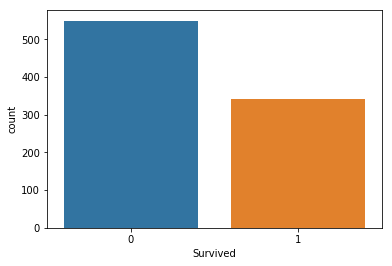

In [17]:
sns.countplot(x = "Survived", data = data_set)

In [18]:
num_survived = len(data_set[data_set["Survived"]==1])
num_survived

342

In [19]:
num_died = len(data_set[data_set["Survived"]==0])
num_died

549

In [20]:
pct_survived = num_survived/(num_died+num_survived)
pct_survived

0.3838383838383838

# Exploratory Data Visualization

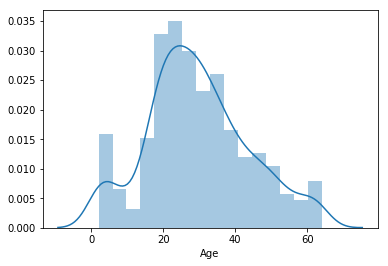

In [21]:
sns.distplot(data_set['Age'].dropna(),kde=True)

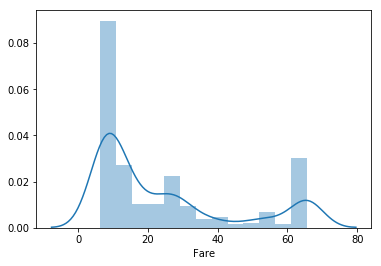

In [22]:
sns.distplot(data_set['Fare'].dropna(),kde=True)

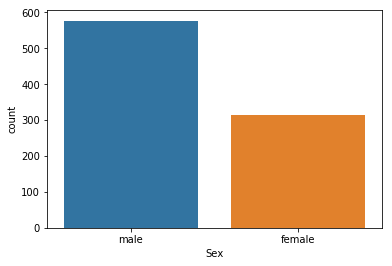

In [23]:

sns.countplot(x= "Sex", data=data_set)

# Replacing all Null Values

In [24]:
data_set[data_set.Age.isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [25]:
data_set.Age.fillna(mean_age,inplace=True)

In [26]:
data_set[data_set.Age.isnull()].index

Int64Index([], dtype='int64')

# Logistic Regression Model

In [56]:
le = preprocessing.LabelEncoder()
le.fit(data_set['Sex'])
sex = le.transform(data_set['Sex'])
data_set.drop(['Sex'], axis = 1)
data_set['Sex'] = sex

In [57]:
newX = data_set.drop(["PassengerId","Pclass","Name","Ticket","Embarked", "Survived", "Cabin"],axis=1)
y = data_set["Survived"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size = 0.3, random_state = 101)

In [59]:
datadict = pd.DataFrame(newX.dtypes)
datadict

,0
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64


In [60]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Model Evaluation

In [61]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.78      0.85      0.81       154
          1       0.77      0.67      0.71       114

avg / total       0.77      0.77      0.77       268



In [62]:
confusion_matrix(y_test, predictions)

array([[131,  23],
       [ 38,  76]])

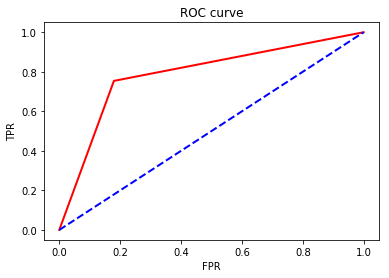

In [63]:

fpr, tpr,_=roc_curve(logmodel.predict(newX),y,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [64]:
roc_auc_score(logmodel.predict(newX),y)

0.7872503544774069